In [2]:
import numpy as np
from scipy import linalg as la
# Problem 1
def cond(A):
    a = la.svdvals(A)
    n = a[0]/a[-1]
    return n

a = np.array([[1,2], [4, 9]])
print(cond(a))
print(np.linalg.cond(a))

101.990195136
101.990195136


In [3]:
# Problem 2
import sympy as sy
from matplotlib import pyplot as plt
# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)
# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
k = np.zeros(100)
rel = np.zeros(100)

def exper():
    # Perturb one of the coefficients very slightly.
    ite = 1
    while ite < 100:
        h = np.random.normal(1, 1e-10, 21)
        h = np.array(h, dtype='complex')
        new_coeffs = w_coeffs * h
        new_coeffs = np.array(new_coeffs, dtype = 'complex')
    # Use NumPy to compute the roots of the perturbed polynomial.
        new_roots = np.roots(np.poly1d(new_coeffs))
       
        plt.scatter(new_roots.real, new_roots.imag, c = 'black', marker = ',', s = 4)
        k[ite] = la.norm(new_roots - w_roots, np.inf) / la.norm(new_coeffs - w_coeffs, np.inf)
        rel[ite] = k[ite] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        ite += 1
    plt.scatter(w_roots.real, w_roots.imag, c = 'b', marker = 'o')
    plt.show()
    return np.mean(k), np.mean(rel)

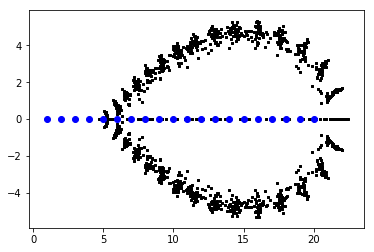

(1.5151045193286416e-08, 10457069393.233923)

In [4]:
exper()

In [5]:
# Problem 3
def cond_complex(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    v = la.eigvals(A)
    v_tilde = la.eigvals(A + H)
    k_hat = la.norm(v - v_tilde)/la.norm(H)
    k = la.norm(A)/la.norm(v) * k_hat
    return k_hat, k

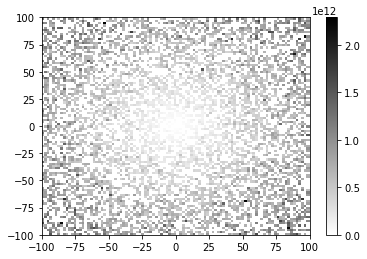

In [6]:
# Problem 4
def prob4(bound, res):
    x = np.linspace(bound[0], bound[1], res)
    y = np.linspace(bound[2], bound[3], res)
    z = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            mat = np.array([[1, x[i]],[y[j], 1]])
            z[i, j] = cond_complex(mat)[1]
    plt.pcolormesh(x, y, z, cmap = 'gray_r')
    plt.colorbar()
    plt.show()
prob4([-100, 100, -100, 100], 100)
            

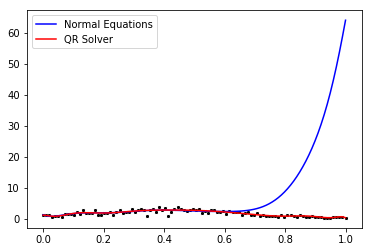

(151.49194685946216, 15.438264519331229)

In [7]:
# Problem 5
from scipy import linalg as la
def prob5(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    
    x1 = np.dot(np.dot(la.inv(np.dot(A.T, A)), A.T), yk)
    Q, R = la.qr(A, mode = 'economic')
    x2 = la.solve(R, np.dot(Q.T, yk))
    plt.scatter(xk, yk, marker = 'x', c='black', s = 5)
    plt.plot(xk, np.poly1d(x1)(xk), label = 'Normal Equations', c='b')
    plt.plot(xk, np.poly1d(x2)(xk), label = 'QR Solver', c='r')
    plt.legend()
    plt.show()
    
    error1 = la.norm(np.poly1d(x1)(xk) - xk)
    error2 = la.norm(np.poly1d(x2)(xk) - xk)
    
    return error1, error2
    
prob5(14)

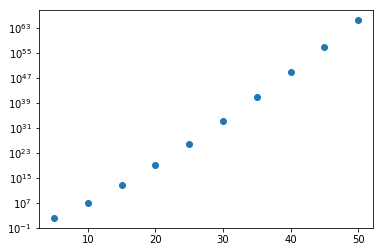

In [28]:
# Problem 6
diff = np.zeros(10)
f = np.zeros(10)
for i in range(10):
    n = 5 * (i + 1)
    x = sy.Symbol('x')
    I1 = sy.integrate((x ** n) * sy.exp(x - 1), (x, 0, 1))
    I2 = float(((-1) ** n) * sy.subfactorial(n) + ((-1) ** (n+1)) * (sy.factorial(n)))/float(sy.exp(1))
    diff[i] = float(abs(I2 - I1))/float(abs(I1))
n = np.arange(5, 55, 5)
plt.scatter(n, diff)
plt.yscale('log')
plt.show()

This is not a stable way because the relative forward error grows large as n increases.